In [41]:
from CAN import CAN
from PCAN import PCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score

In [43]:
# Calculate the mean square error
import numpy as np
def project_mse(pro_matrix, X):

    X_centered = X - np.mean(X, axis = 0)
    mse = 0
    for i in range(len(X)):
        x_i = X_centered[i]
        projection = np.dot(np.dot(x_i, pro_matrix.T), pro_matrix)
        mse += np.linalg.norm(x_i - projection) ** 2
    mse /= len(X)
    return mse


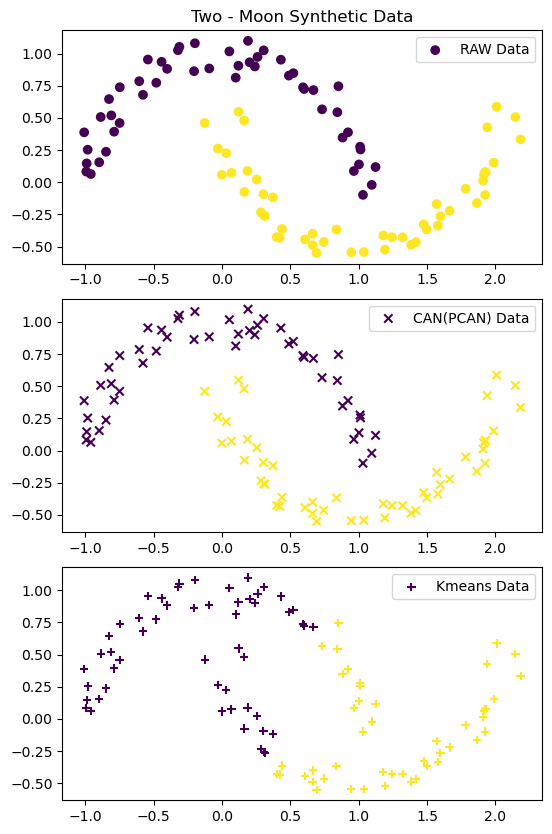

Mean square error of PCA: 4.058393493897563e-32
Mean square error of PCAN: 2.993448838436776e-32


In [45]:
#Two - Moon Synthetic Data
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

X, y = make_moons(n_samples=100, noise=0.07, random_state=39) #33
y_CAN, S_PCA = CAN(X, c=2, k=5, islocal=1)
W_PCAN, y_PCAN, S_PCAN = PCAN(X, c=2, k=5, m=2, islocal=1)
X_PCAN = (X - np.mean(X, axis = 0)) @ W_PCAN
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
W_PCA = pca.components_

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)  
y_kmeans = kmeans.predict(X)

plt.figure(figsize=(6, 10))
plt.subplot(3, 1, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', label='RAW Data')
plt.title('Two - Moon Synthetic Data')
#plt.xlabel('Feature 1')
#plt.ylabel('Feature 2')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_CAN, cmap='viridis', marker='x', label='CAN(PCAN) Data')
#plt.title('Two - Moon Synthetic CAN(PCAN) Data')
#plt.xlabel('Feature 1')
#plt.ylabel('Feature 2')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='+', label='Kmeans Data')
#plt.title('Two - Moon Synthetic Kmeans Data')
#plt.xlabel('Feature 1')
#plt.ylabel('Feature 2')
plt.legend()

plt.subplots_adjust(left=0.1, hspace=0.15)
#plt.savefig('Two_Moon_Synthetic.png')
plt.show()

mse_PCA = project_mse(W_PCA, X)
print(f'Mean square error of PCA: {mse_PCA}')
mse_PCAN = project_mse(W_PCAN.T, X)
print(f'Mean square error of PCAN: {mse_PCAN}')

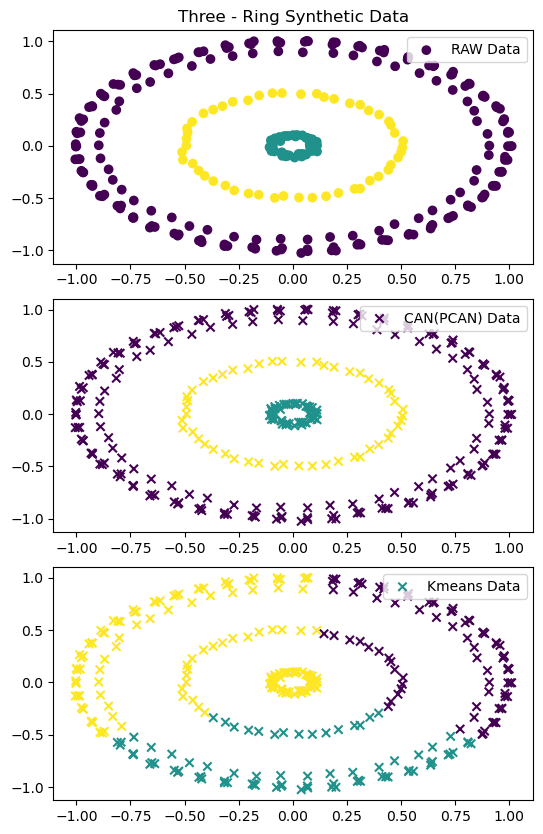

Mean square error of PCA: 2.3176347900014335e-32
Mean square error of PCAN: 4.7130762054423167e-32


In [309]:
# Three - Ring Synthetic Data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

n_samples = 100
X1, y1 = make_circles(n_samples=n_samples, factor=0.1, noise=0.01)
X10 = X1[y1 == 0]
y10 = y1[y1 == 0]
X11 = X1[y1 == 1]
y11 = y1[y1 == 1] + 1

X1 = np.vstack((X10, X11))
y1 = np.concatenate((y10, y11), axis=0)
X2, y2 = make_circles(n_samples=n_samples, factor=0.5, noise=0.01)
X20 = X2[y2 == 0]
y20 = y2[y2 == 0]
X22 = X2[y2 == 1]
y22 = y2[y2 == 1] + 3
X2 = np.vstack((X20, X22))
y2 = np.concatenate((y20, y22), axis=0)
X3, y3 = make_circles(n_samples=n_samples, factor=0.9, noise=0.01)
y3 = np.zeros(n_samples)

X = np.vstack((X1, X2, X3))
y = np.hstack((y1, y2, y3))

y_CAN, S_CAN= CAN(X, c=3, k=5, islocal=1)
W_PCAN, y_PCAN, S_PCAN= PCAN(X, c=3, k=5, m=2, islocal=1)
X_PCAN = (X - np.mean(X, axis = 0)) @ W_PCAN
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
W_PCA = pca.components_

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)  
y_kmeans = kmeans.predict(X)

plt.figure(figsize=(6, 10))
plt.subplot(3, 1, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', label='RAW Data')
plt.title('Three - Ring Synthetic Data')
#plt.xlabel('Feature 1')
#plt.ylabel('Feature 2')
plt.legend(loc='upper right')

plt.subplot(3, 1, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_PCAN, cmap='viridis', marker='x', label='CAN(PCAN) Data')
#plt.title('Three - Ring Synthetic CAN(PCAN) Data')
#plt.xlabel('Feature 1')
#plt.ylabel('Feature 2')
plt.legend(loc='upper right')

plt.subplot(3, 1, 3)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='x', label='Kmeans Data')
#plt.title('Three - Ring Synthetic Kmeans Data')
#plt.xlabel('Feature 1')
#plt.ylabel('Feature 2')
plt.legend(loc='upper right')

plt.subplots_adjust(left=0.1, hspace=0.15)
plt.savefig('Three_Ring_Synthetic.png')
plt.show()

mse_PCA = project_mse(W_PCA, X)
print(f'Mean square error of PCA: {mse_PCA}')
mse_PCAN = project_mse(W_PCAN.T, X)
print(f'Mean square error of PCAN: {mse_PCAN}')

In [271]:
from sklearn.metrics import adjusted_rand_score
print("For three-ring data, k neighbour of CAN and PCAN: 5, main components of PCAN: 2")
ari_kmeans = adjusted_rand_score(list(y.reshape(-1)), y_kmeans)
print("Adjusted Rand Index for kmeans:", ari_kmeans)
ari_CAN = adjusted_rand_score(list(y.reshape(-1)), y_CAN)
print("Adjusted Rand Index for CAN:", ari_CAN)
ari_PCAN = adjusted_rand_score(list(y.reshape(-1)), y_PCAN)
print("Adjusted Rand Index for PCAN:", ari_PCAN)

For three-ring data, k neighbour of CAN and PCAN: 5, main components of PCAN: 2
Adjusted Rand Index for kmeans: 0.01370688552302397
Adjusted Rand Index for CAN: 1.0
Adjusted Rand Index for PCAN: 1.0


In [47]:
#Wine
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import StandardScaler
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 
X = X.to_numpy(dtype=float)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = y.to_numpy(dtype=int)


In [37]:
#Yeast
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import StandardScaler
import pandas as pd
  
# fetch dataset 
yeast = fetch_ucirepo(id=110) 
  
# data (as pandas dataframes) 
X = yeast.data.features 
y = yeast.data.targets 
  
# metadata 
print(yeast.metadata) 
  
# variable information 
print(yeast.variables) 
X = X.to_numpy(dtype=float)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y['Category_Code'] = pd.factorize(y['localization_site'])[0]
y = y['Category_Code'].to_numpy(dtype=int)


{'uci_id': 110, 'name': 'Yeast', 'repository_url': 'https://archive.ics.uci.edu/dataset/110/yeast', 'data_url': 'https://archive.ics.uci.edu/static/public/110/data.csv', 'abstract': 'Predicting the Cellular Localization Sites of Proteins', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1484, 'num_features': 8, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['localization_site'], 'index_col': ['Sequence_Name'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1991, 'last_updated': 'Sat Oct 28 2023', 'dataset_doi': '10.24432/C5KG68', 'creators': ['Kenta Nakai'], 'intro_paper': None, 'additional_info': {'summary': 'Predicted Attribute: Localization site of protein. ( non-numeric ).\r\n\r\nThe references below describe a predecessor to this dataset and its development. They also give results (not cross-validated) for classification by a rule-based expert system with that version of th

/var/folders/jc/2_985f5j7693q3lkwv3pszxm0000gn/T/ipykernel_39262/1280490649.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Category_Code'] = pd.factorize(y['localization_site'])[0]


In [29]:
#Ecoli
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/ecoli.csv', header=None)
df.columns = ['f1','f2','f3','f4','f5','f6','f7','class label']
df['class label'] = df['class label'].replace(['cp','im','imS','imL','imU','om','omL','pp'],[1,2,3,4,5,6,7,8])
X = df.iloc[:, [0,1,2,3,4,5,6]].to_numpy(dtype=float)
y = df.iloc[:, [7]].to_numpy(dtype=int)

/var/folders/jc/2_985f5j7693q3lkwv3pszxm0000gn/T/ipykernel_39262/58837735.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class label'] = df['class label'].replace(['cp','im','imS','imL','imU','om','omL','pp'],[1,2,3,4,5,6,7,8])


In [51]:
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans

C = 3
k = 35
m = 5
y_CAN, S_CAN = CAN(X, c=C, k=35, islocal=1)
W_PCAN, y_PCAN, S_PCAN = PCAN(X, c=C, k=k, m=m, islocal=1)
X_PCAN = (X - np.mean(X, axis = 0)) @ W_PCAN
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
W_PCA = pca.components_

ari_KMEANS = []
for i in range(100):
    kmeans = KMeans(n_clusters=C)
    kmeans.fit(X)  
    y_kmeans = kmeans.predict(X)
    ari_kmeans = adjusted_rand_score(list(y.reshape(-1)), y_kmeans)
    ari_KMEANS.append(ari_kmeans)

print(f"For Wine data, k neighbour of CAN and PCAN: {k}, main components of PCAN: {m}")
print(f"Adjusted Rand Index for kmeans with mean: {np.mean(ari_KMEANS)}, with std: {np.std(ari_KMEANS)}")
ari_CAN = adjusted_rand_score(list(y.reshape(-1)), y_CAN)
print("Adjusted Rand Index for CAN:", ari_CAN)
ari_PCAN = adjusted_rand_score(list(y.reshape(-1)), y_PCAN)
print("Adjusted Rand Index for PCAN:", ari_PCAN)
mse_PCA = project_mse(W_PCA, X)
print(f'Mean square error of PCA: {mse_PCA}')
mse_PCAN = project_mse(W_PCAN.T, X)
print(f'Mean square error of PCAN: {mse_PCAN}')

For Wine data, k neighbour of CAN and PCAN: 35, main components of PCAN: 5
Adjusted Rand Index for kmeans with mean: 0.8762954300151903, with std: 0.0582844323002964
Adjusted Rand Index for CAN: 0.8961288077970022
Adjusted Rand Index for PCAN: 0.9471317617859916
Mean square error of PCA: 2.578901941778776
Mean square error of PCAN: 3.5399633490217086


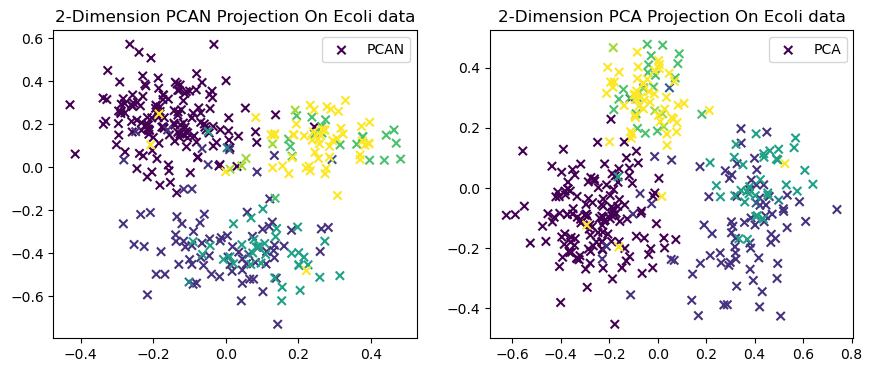

In [355]:
# 2-Dimension Projection
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_PCAN[:, 0], X_PCAN[:, 1], c=y.reshape(-1), cmap='viridis', marker='x', label='PCAN')
plt.title('2-Dimension PCAN Projection On Ecoli data')
#plt.xlabel('Feature 1')
#plt.ylabel('Feature 2')
plt.legend()


plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.reshape(-1), cmap='viridis', marker='x', label='PCA')
plt.title('2-Dimension PCA Projection On Ecoli data')
#plt.xlabel('Feature 1')
#plt.ylabel('Feature 2')
plt.legend()

plt.subplots_adjust(left=0.1, hspace=0.25)
#plt.savefig('2-DimensionProjection_Ecoli.png')
plt.show()

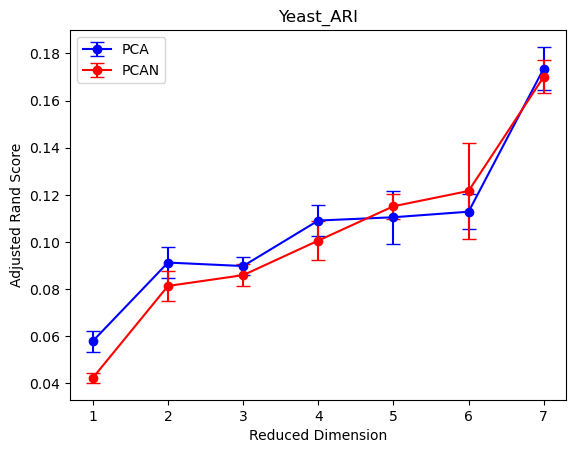

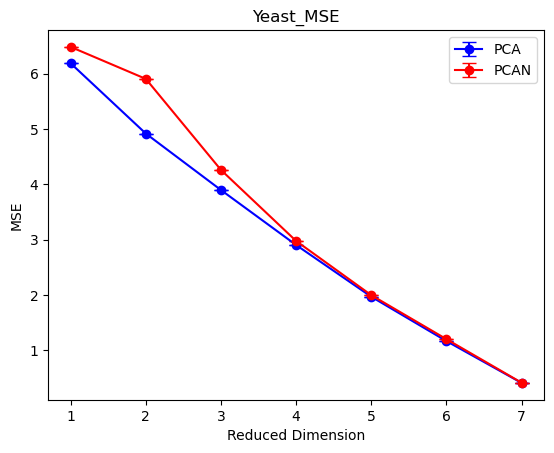

In [39]:
#Projection ability measurement with ARI and MSE on real datasets.
mean_pcan = []
std_pcan = []
mean_mse_pcan = []
std_mse_pcan = []
mean_pca = []
std_pca = []
mean_mse_pca = []
std_mse_pca = []
C = 10 #3 10 8

for j in range(len(X[0])-1): 
    ark_pcan = []
    ark_pca = []
    mse_pcan = []
    mse_pca = []

    for i in range(100):
        W_PCAN, y_PCAN, S_PCAN = PCAN(X, c=C, k=35, m=j+1, islocal=1)
        X_PCAN = (X - np.mean(X, axis = 0)) @ W_PCAN
        pca = PCA(n_components=j+1)
        X_pca = pca.fit_transform(X)
        W_PCA = pca.components_
        kmeans = KMeans(n_clusters=C)
        kmeans.fit(X_PCAN)  
        y_kmeans_pcan = kmeans.predict(X_PCAN)
        kmeans = KMeans(n_clusters=C)
        kmeans.fit(X_pca)  
        y_kmeans_pca = kmeans.predict(X_pca)
        ari_k_pcan = adjusted_rand_score(list(y.reshape(-1)), y_kmeans_pcan)
        ari_k_pca = adjusted_rand_score(list(y.reshape(-1)), y_kmeans_pca)
        ark_pcan.append(ari_k_pcan)
        ark_pca.append(ari_k_pca)
        
        mse_PCA = project_mse(W_PCA, X)
        mse_PCAN = project_mse(W_PCAN.T, X)
        mse_pca.append(mse_PCA)
        mse_pcan.append(mse_PCAN)

        
    mean_pcan.append(np.mean(ark_pcan))
    mean_pca.append(np.mean(ark_pca))
    std_pcan.append(np.std(ark_pcan))
    std_pca.append(np.std(ark_pca))
    mean_mse_pcan.append(np.mean(mse_pcan))
    std_mse_pcan.append(np.std(mse_pcan))
    mean_mse_pca.append(np.mean(mse_pca))
    std_mse_pca.append(np.std(mse_pca))
    
reduced_dimensions = np.arange(1, j+2)

plt.errorbar(reduced_dimensions, mean_pca, yerr=std_pca, fmt='o-', capsize=5, label='PCA', color='blue')
plt.errorbar(reduced_dimensions, mean_pcan, yerr=std_pcan, fmt='o-', capsize=5, label='PCAN', color='red')

plt.title('Yeast_ARI') #Wine Yeast Ecoli
plt.xlabel('Reduced Dimension')
plt.ylabel('Adjusted Rand Score')
plt.legend()
plt.savefig('Yeast_reduced.png')
plt.show()

plt.errorbar(reduced_dimensions, mean_mse_pca, yerr=std_mse_pca, fmt='o-', capsize=5, label='PCA', color='blue')
plt.errorbar(reduced_dimensions, mean_mse_pcan, yerr=std_mse_pcan, fmt='o-', capsize=5, label='PCAN', color='red')

plt.title('Yeast_MSE') #Wine Yeast Ecoli
plt.xlabel('Reduced Dimension')
plt.ylabel('MSE')
plt.legend()
plt.savefig('Yeast_reduced.png')
plt.show()

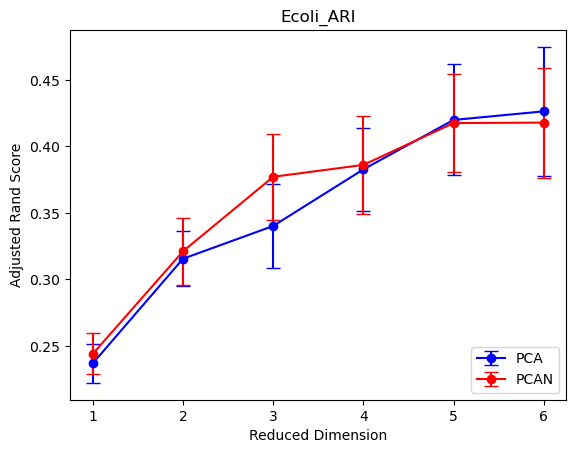

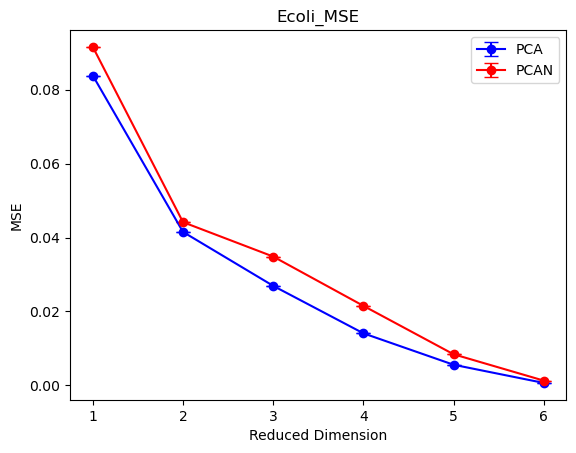

In [35]:
import matplotlib.pyplot as plt
reduced_dimensions = np.arange(1, j+2)

plt.errorbar(reduced_dimensions, mean_pca, yerr=std_pca, fmt='o-', capsize=5, label='PCA', color='blue')
plt.errorbar(reduced_dimensions, mean_pcan, yerr=std_pcan, fmt='o-', capsize=5, label='PCAN', color='red')

plt.title('Ecoli_ARI') #Wine Yeast Ecoli
plt.xlabel('Reduced Dimension')
plt.ylabel('Adjusted Rand Score')
plt.legend(loc='lower right')
plt.savefig('Ecoli_reduced_ARI.png')
plt.show()

plt.errorbar(reduced_dimensions, mean_mse_pca, yerr=std_mse_pca, fmt='o-', capsize=5, label='PCA', color='blue')
plt.errorbar(reduced_dimensions, mean_mse_pcan, yerr=std_mse_pcan, fmt='o-', capsize=5, label='PCAN', color='red')

plt.title('Ecoli_MSE') #Wine Yeast Ecoli
plt.xlabel('Reduced Dimension')
plt.ylabel('MSE')
plt.legend()
plt.savefig('Ecoli_reduced_mse.png')
plt.show()

<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:21: SyntaxWarning: invalid escape sequence '\p'
/var/folders/jc/2_985f5j7693q3lkwv3pszxm0000gn/T/ipykernel_93539/2081228436.py:21: SyntaxWarning: invalid escape sequence '\p'
  cell_text = f"{value:.2f}$\pm${error:.2f}"


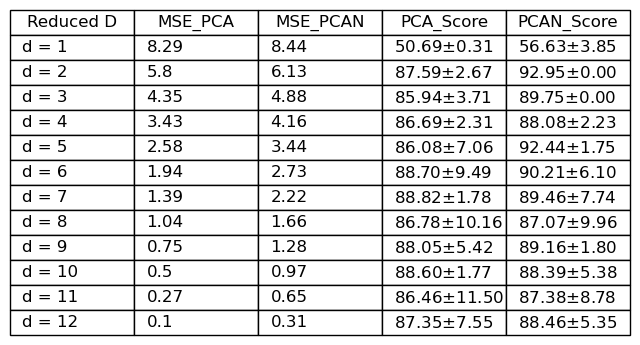

In [159]:
import matplotlib.pyplot as plt
import numpy as np

data = []

mse_list = np.array([np.round(mean_mse_pca,2),np.round(mean_mse_pcan,2)]).T
dict_list = np.array([np.round(mean_pca,4) * 100,np.round(mean_pcan,4) * 100]).T
error_dict_list = np.array([np.round(std_pca,4) * 100,np.round(std_pcan,4) * 100]).T

for i in range(len(dict_list)):
    row_data = []
    col = f"d = {i+1}"
    cell_text1 = f"{mse_list[i][0]}"
    cell_text2 = f"{mse_list[i][1]}"
    row_data.append(col)
    row_data.append(cell_text1)
    row_data.append(cell_text2)
    for j in range(2):
        value = dict_list[i][j]
        error = error_dict_list[i][j]
        cell_text = f"{value:.2f}$\pm${error:.2f}"
        row_data.append(cell_text)
    data.append(row_data)

fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')  

table = ax.table(cellText=data,
                 colLabels=['Reduced D','MSE_PCA','MSE_PCAN','ARI_PCA', 'ARI_PCAN'],
                 loc='center',
                 cellLoc="left")

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5) 

#plt.savefig('Wine_result.png')
plt.show()
